In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

crops = pd.read_csv('european_crops_cleaned.csv')

In [2]:
crops.head()

,Area,Item,Element,Unit,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
0,Albania,Apples,Production,tonnes,15000.0,16000.0,27566.0,36000.0,45000.0,47202.0,54604.0,64000.0,71300.0,75730.0,82060.0
1,Albania,Apricots,Production,tonnes,1800.0,2000.0,1900.0,2000.0,3500.0,3850.0,3471.0,3900.0,4430.0,4400.0,4140.0
2,Albania,Barley,Production,tonnes,3700.0,4100.0,6000.0,3500.0,3600.0,4500.0,7300.0,8700.0,7000.0,6970.0,7300.0
3,Albania,"Beans, dry",Production,tonnes,22400.0,23600.0,24300.0,20800.0,21800.0,23000.0,24000.0,25300.0,27000.0,28000.0,30000.0
4,Albania,"Beans, green",Production,tonnes,7600.0,7800.0,16000.0,7000.0,7100.0,6902.0,9307.0,8200.0,8400.0,9170.0,11130.0


# We can see that for one country we have several items over the years. We want to see is the production is constant over the year so we will do a groupby Item for all countries

In [3]:
average_data = crops.groupby(['Item']).mean().reset_index()
average_data.head()

,Item,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
0,"Almonds, with shell",20018.384615,31031.307692,37935.769231,27660.461538,26467.846154,33163.846154,28746.384615,27266.076923,26240.000000,18831.307692,23254.461538
1,"Anise, badian, fennel, coriander",5045.538462,3545.230769,3954.230769,2885.692308,4305.615385,4925.461538,5733.230769,6571.538462,5546.384615,5325.076923,7109.692308
2,Apples,462364.500000,422353.166667,423226.388889,401989.861111,419469.611111,430037.555556,384973.194444,414097.305556,408311.222222,443386.777778,476325.166667
3,Apricots,39088.478261,39888.130435,36784.826087,32684.434783,32803.130435,36633.521739,34287.260870,38952.565217,36965.173913,39750.043478,40367.521739
4,Artichokes,125950.714286,107287.714286,111617.428571,111150.000000,107947.000000,107723.571429,100560.428571,106759.000000,90799.571429,103617.428571,105355.857143


In [4]:
average_data.shape

(136, 12)

# We have many items so we will first look into only some of them by formating the data

In [5]:
sns.set_theme(style="darkgrid")
ploted_data = average_data.melt('Item', var_name='year',  value_name='production')
ploted_data['year'] = ploted_data['year'].apply(lambda x: x[1:]).astype(int)
ploted_data.head()

,Item,year,production
0,"Almonds, with shell",2004,20018.384615
1,"Anise, badian, fennel, coriander",2004,5045.538462
2,Apples,2004,462364.500000
3,Apricots,2004,39088.478261
4,Artichokes,2004,125950.714286


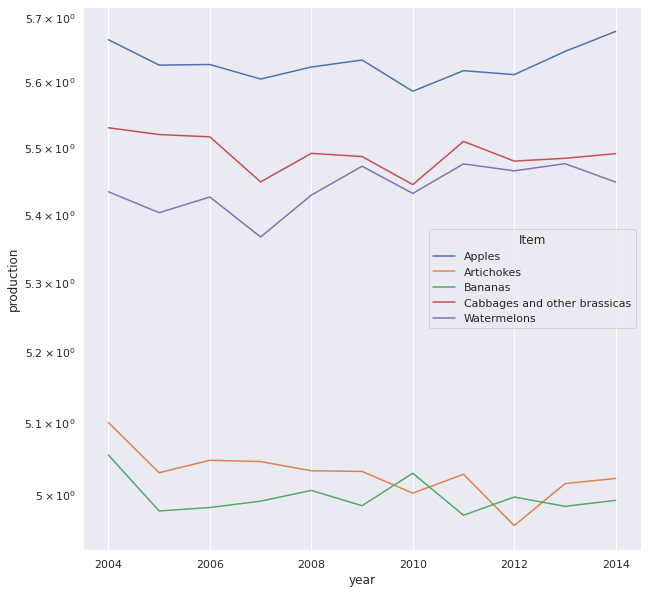

In [6]:
searched_item = 'Item=="Apples" or Item=="Watermelons" or Item=="Artichokes" or Item=="Bananas" or Item=="Cabbages and other brassicas"'
fig, ax = plt.subplots(figsize=(10,10))
ax.set_yscale('log')
f = sns.lineplot(x="year", y="production", hue='Item', 
     data=ploted_data.query(searched_item), ax=ax)

# Insights: 2005 and 2010 seems like a hard year, almost all Items production decrease. 2007 also but not for Bananas and Artichokes. We must confirm that with more data

<AxesSubplot:xlabel='year'>

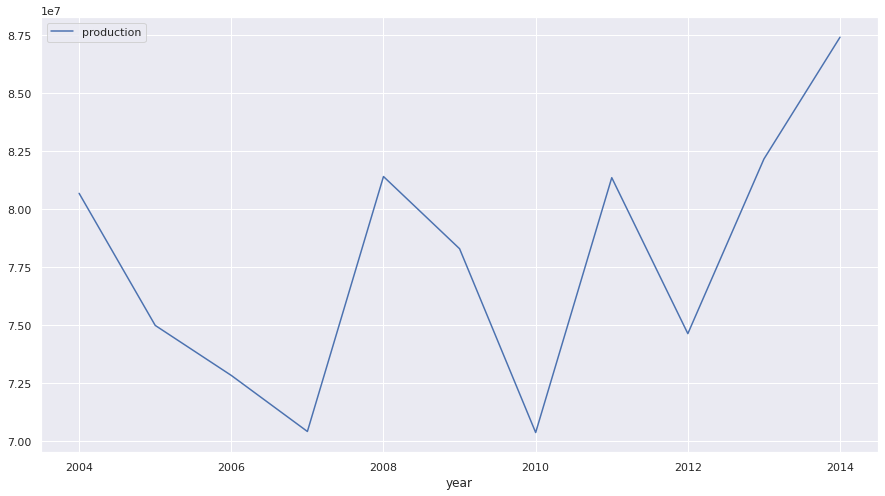

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=ploted_data.groupby(['year']).sum())

# We grouped all items by year and sum the production. We can see that our insights were good : 2005, 2007 and 2010 are indeed hard years for production. We also see that 2012 is also a hard year and we didn't saw that on our sample

# Now we want to see the production by country if some countries are more affected than others. Let's focus on 2012 and 2014

In [12]:
production_by_country = crops.groupby(['Area']).sum()
production_by_country.head()

,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
Area,,,,,,,,,,,
Albania,4679292.0,4785396.0,4870858.0,4794783.0,5455845.0,5697451.0,6455425.0,6792519.0,6921606.0,6924235.0,7034370.0
Austria,29847762.0,28324756.0,24935289.0,26366156.0,30833135.0,28493460.0,28961266.0,32948171.0,28532669.0,27285644.0,33137216.0
Belarus,56417200.0,50660367.0,51213507.0,56230391.0,64369705.0,59377128.0,54735480.0,56468214.0,59926311.0,51047451.0,59732134.0
Belgium,30338723.0,28483306.0,27389021.0,29101766.0,28585282.0,30800607.0,29747377.0,31395314.0,28802757.0,30199054.0,32889011.0
Bosnia and Herzegovina,9319845.0,8934620.0,8928500.0,7468498.0,9134838.0,9136719.0,8011715.0,8001476.0,6709426.0,8578135.0,7390294.0


In [16]:
ploted_data_by_country = production_by_country[['Y2012','Y2014']].reset_index().melt('Area', var_name='Year',  value_name='production')
ploted_data_by_country['Year'] = ploted_data_by_country['Year'].apply(lambda x: x[1:]).astype(int)
ploted_data_by_country.head()

,Area,Year,production
0,Albania,2012,6921606.0
1,Austria,2012,28532669.0
2,Belarus,2012,59926311.0
3,Belgium,2012,28802757.0
4,Bosnia and Herzegovina,2012,6709426.0


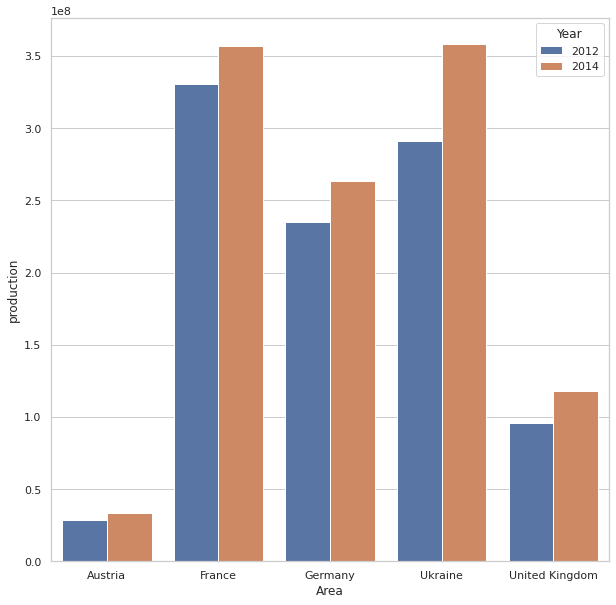

In [17]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x="Area", y="production", hue="Year", data=ploted_data_by_country.query(
    '''Area=="Austria" or Area=="France" or Area=="Ukraine" or Area=="United Kingdom" or Area=="Germany"'''
    ))

## We can see that this little sample shows that 2014 is a better year than 2012

In [18]:
# Let's check if there are some countries with a better production in 2012
production_by_country[production_by_country.Y2012 > production_by_country.Y2014]

,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
Area,,,,,,,,,,,
Belarus,56417200.0,50660367.0,51213507.0,56230391.0,64369705.0,59377128.0,54735480.0,56468214.0,59926311.0,51047451.0,59732134.0
Greece,49732204.0,50133206.0,46433884.0,43995978.0,45608524.0,44949549.0,39788327.0,43696040.0,44409554.0,43888906.0,40239607.0
Iceland,35285.0,39109.0,40892.0,39539.0,39613.0,34053.0,39961.0,30282.0,35604.0,25761.0,30826.0


In [19]:
production_by_country['2012_is_better'] = np.where(production_by_country.Y2012 > production_by_country.Y2014, 1, 0)

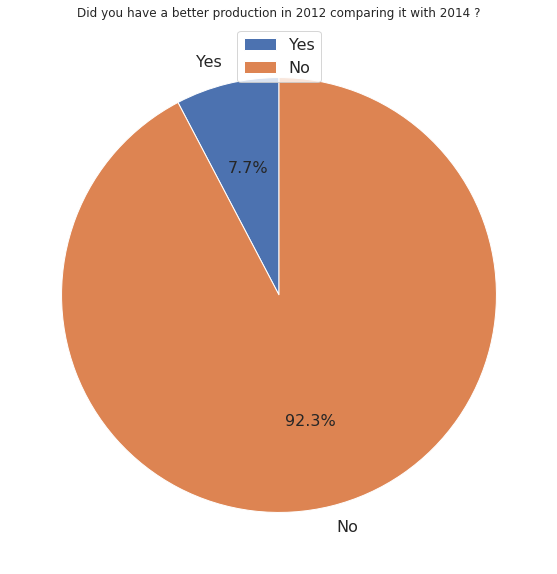

In [21]:
country_with_better_2012_y = production_by_country['2012_is_better'].sum()

df = pd.DataFrame({"2012_is_better":["Yes", "No"], 
                    "BestYear":[country_with_better_2012_y,meaned_data_bycountry.shape[0]-country_with_better_2012_y]})

_, ax = plt.subplots(figsize = (10,10))
wedges,_,_ = ax.pie(df['BestYear']
                    ,labels=df["2012_is_better"]
                    ,shadow=False,startangle=90, autopct="%1.1f%%"
                    ,textprops={'fontsize': 16})
ax.set_title("Did you have a better production in 2012 comparing it with 2014 ?")
ax.legend(wedges,df["2012_is_better"], loc="upper center", prop={'size': 16});

# We can now look if production by country is globally the same over the years or if we have great differences

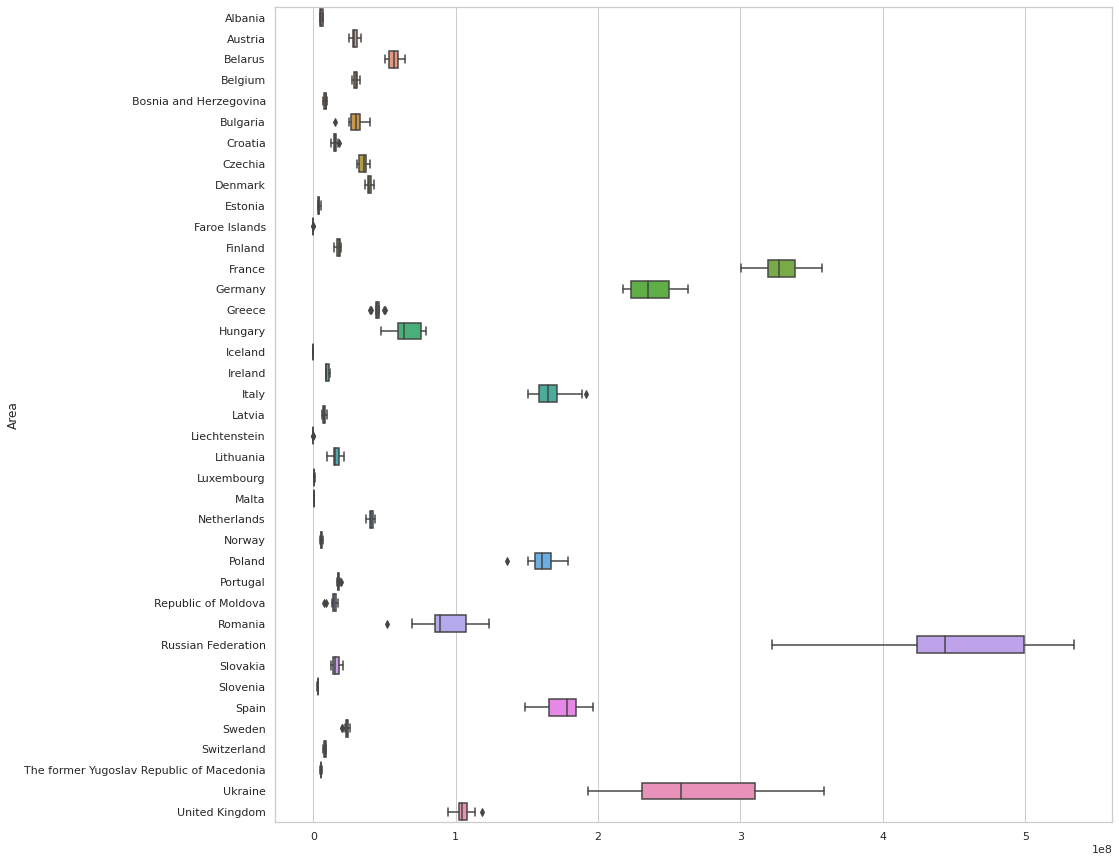

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.boxplot(data=production_by_country.drop('2012_is_better',axis=1).T.reset_index(), orient='h')

# We can see that there are a few countries with a lot of production. Russia, France and Ukraine are the biggest productor, Russia and Ukraine have lot of variability

<AxesSubplot:ylabel='Area'>

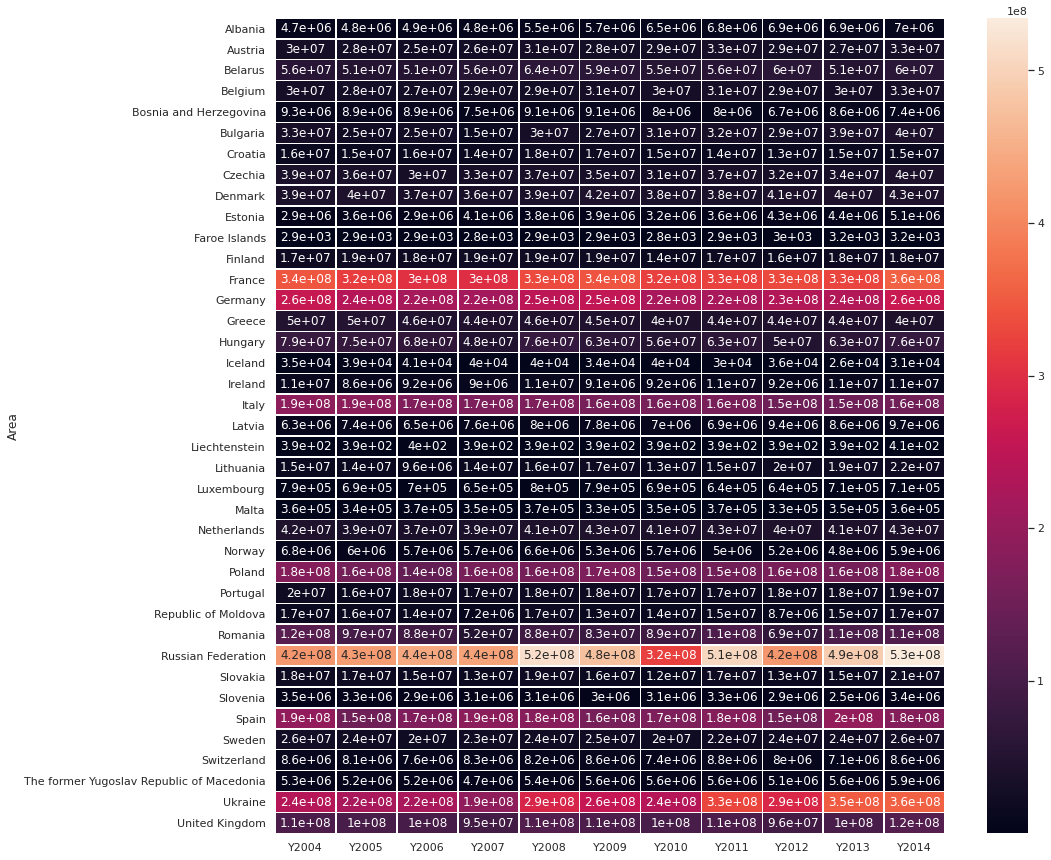

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(production_by_country.drop('2012_is_better',axis=1), annot=True, linewidths=.5, ax=ax)

# With this heatmap we confirm what we saw for Russia, Ukrain and France. We can see that the majority of other country have much less production than these.